In [1]:
%matplotlib inline

In [2]:
from nilearn import plotting
import matplotlib.pyplot as plt
import nibabel as nb
import numpy as np

## Option 1: mri_label2surf with aparc.annot file

#### 1a. Project atlas from fsaverage to MNI 2mm using mni.register.dat

(here for pial, same principal for white matter surface)

    export SUBJECT_DIR=$FREESURFER_HOME/subjects
    
    mri_label2vol --subject fsaverage --annot aparc.annot --reg $SUBJECT_DIR/fsaverage/mri/transforms/reg.mni152.2mm.dat --hemi rh --temp $FSLDIR/data/standard/MNI152_T1_2mm_brain.nii.gz --surf pial --o dk2mni_2mm_rh_pial.nii.gz
    
    mri_label2vol --subject fsaverage --annot aparc.annot --reg $SUBJECT_DIR/fsaverage/mri/transforms/reg.mni152.2mm.dat --hemi lh --temp $FSLDIR/data/standard/MNI152_T1_2mm_brain.nii.gz --surf pial --o dk2mni_2mm_lh_pial.nii.gz

#### 1b. Resample to 1mm MNI space with FSL flirt

    flirt -in dk2mni_2mm_rh_pial.nii.gz -applyisoxfm 1 -interp nearestneighbour -ref /usr/share/data/fsl-mni152-templates/MNI152_T1_1mm_brain.nii.gz -out dk2mni_1mm_rh_pial.nii.gz

    flirt -in dk2mni_2mm_lh_pial.nii.gz -applyisoxfm 1 -interp nearestneighbour -ref /usr/share/data/fsl-mni152-templates/MNI152_T1_1mm_brain.nii.gz -out dk2mni_1mm_lh_pial.nii.gz 

## Option 2: Use aparc+aseg.mgz file

#### 2.a Resample from MNI305 to MNI152 1mm space

    flirt -interp nearestneighbour -nosearch -in $SUBJECT_DIR/fsaverage/mri/aparc+aseg.nii.gz -ref $FSLDIR/data/standard/MNI152_T1_1mm_brain.nii.gz -out aparc+aseg_MNI152_1mm.nii.gz

#### 2.b seperate hemispheres for visualization

In [3]:
aparc_aseg_data=nb.load('aparc+aseg_MNI152_1mm.nii.gz').get_data()
aparc_aseg_affine=nb.load('aparc+aseg_MNI152_1mm.nii.gz').get_affine()

In [4]:
aparc_aseg_data[np.where(aparc_aseg_data<500)]=0
aparc_aseg_left = aparc_aseg_data.copy()
aparc_aseg_left[np.where(aparc_aseg_data>1500)]=0
aparc_aseg_nii_left=nb.Nifti1Image(aparc_aseg_left, affine=aparc_aseg_affine)
aparc_aseg_right = aparc_aseg_data.copy()
aparc_aseg_right[np.where(aparc_aseg_data<1500)]=0
aparc_aseg_nii_right=nb.Nifti1Image(aparc_aseg_right, affine=aparc_aseg_affine)

### Look at it with Nilearn

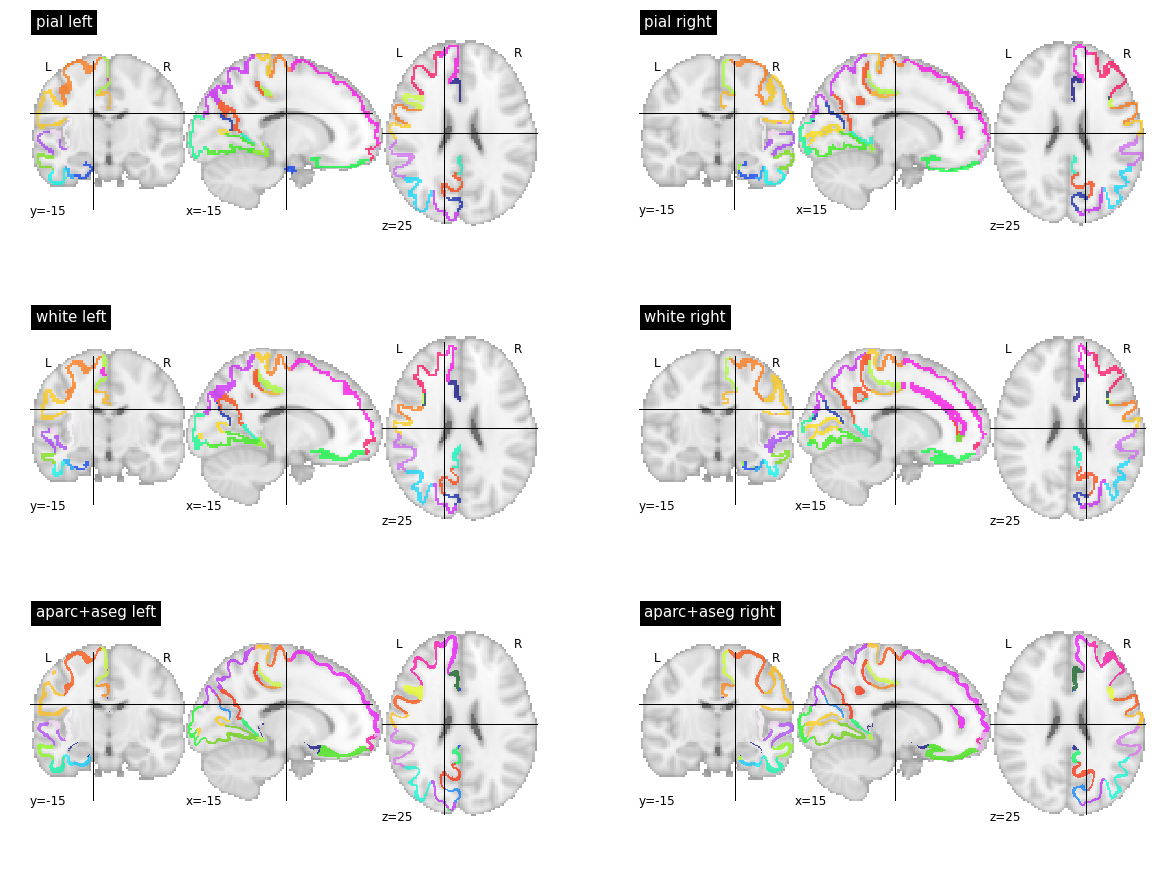

In [5]:
coords_l=(-15, -15, 25)
coords_r=(15, -15, 25)
fig = plt.figure(figsize=(20,15))
ax1=fig.add_subplot(321)
plot=plotting.plot_roi('dk2mni_1mm_lh_pial.nii.gz', cut_coords=coords_l, axes=ax1, title='pial left')
ax2=fig.add_subplot(322)
plot=plotting.plot_roi('dk2mni_1mm_rh_pial.nii.gz',  cut_coords=coords_r, axes=ax2, title='pial right')
ax3=fig.add_subplot(323)
plot=plotting.plot_roi('dk2mni_1mm_lh_white.nii.gz', cut_coords=coords_l, axes=ax3, title='white left')
ax4=fig.add_subplot(324)
plot=plotting.plot_roi('dk2mni_1mm_rh_white.nii.gz',  cut_coords=coords_r, axes=ax4, title='white right')
ax5=fig.add_subplot(325)
plot=plotting.plot_roi(aparc_aseg_nii_left, cut_coords=coords_l, axes=ax5, title='aparc+aseg left')
ax6=fig.add_subplot(326)
plot=plotting.plot_roi(aparc_aseg_nii_right, cut_coords=coords_r, axes=ax6, title='aparc+aseg right')